In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from IPython.display import display, Image
pd.set_option('max_rows', 5)
%matplotlib inline

# 最小二乗法
---
残差の二乗和 $\displaystyle \sum ^{n}_{i=1} e^{2}_{i} =\sum ^{n}_{i=1}\left( y_{i} -\hat{y}_{i}\right)^{2}$ が最小になるように係数を決める方法。  
いくつかの重要な性質を持つ。

## 単回帰方程式の解とデータの重心
---
単回帰方程式 $\boldsymbol{y} =a+b\boldsymbol{x}$ の回帰係数 $a,b$ の解は、 $x$ の分散 $V( x)$ と $x,y$ の共分散 $Cov( x,y)$ を用いて $\displaystyle a=\overline{\boldsymbol{y}} +b\overline{\boldsymbol{x}} ,b=\frac{Cov( x,y)}{V( x)}$ と表される。

$a=\overline{y} -b\overline{x}$ を $\hat{y} =a+bx$ に代入して整理すると、$\hat{y} -\overline{y} =b\left( x-\overline{x}\right)$ となる。つまり、最小二乗法で決定された回帰直線 $\hat{y} =a+bx$ は**データセットの中心 (平均) である $\left(\overline{x} ,\overline{y}\right)$ を通る**傾き $b$ の直線。

証明

---

残差二乗和 ${\displaystyle S=\sum_{i=1}^{n}e_{i}^2}$ を最小化するための回帰係数 $a, b$ を求めるには $S$ を $a, b$ で偏微分した

$
\begin{cases}
    \displaystyle \frac
        {\partial S}
        {\partial a}
    & \displaystyle =\sum ^{n}_{i=1}\{2a-2( y_{i} -bx_{i})\} & \displaystyle =-2\sum ^{n}_{i=1}( y_{i} -a-bx_{i}) & =0 & \cdots ( 1)\\
    \displaystyle \frac
        {\partial S}
        {\partial b}
    & \displaystyle =\sum ^{n}_{i=1}\left\{2x^{2}_{i} b-2( y_{i} -a) x_{i}\right\} & \displaystyle =-2\sum ^{n}_{i=1}( y_{i} -a-bx_{i}) x_{i} & =0 & \cdots ( 2)
\end{cases}
$

を解けば良い。

$(1)$ より

$
\displaystyle \begin{aligned}
    -2\sum ^{n}_{i=1}( y_{i} -a-bx_{i}) & =0\\
    \sum ^{n}_{i=1} y_{i} -\sum ^{n}_{i=1} a-b\sum ^{n}_{i=1} x_{i} & =0\\
    n\overline{y} -na-nb\overline{x} & =0\\
    a & =\overline{y} -b\overline{x}
\end{aligned}
$

これを $(2)$ に代入して

$
\displaystyle \begin{aligned}
    -2\sum ^{n}_{i=1}\left\{y_{i} -\left(\overline{y} -b\overline{x}\right) -bx_{i}\right\} x_{i} & =0\\
     & \\
    \sum ^{n}_{i=1}\left\{\left( y_{i} -\overline{y}\right) -b\left( x_{i} -\overline{x}\right)\right\} x_{i} & =0\\
     & \\
    b\sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right) x_{i} & =\sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right) x_{i}\\
     & \\
    b & =\frac
        {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right) x_{i}}
        {\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right) x_{i}}
\end{aligned}
$

ここで、 $
\displaystyle \overline{x} =\frac
    {\displaystyle \sum ^{n}_{i=1} x_{i}}
    {n}
,\overline{y} =\frac
    {\displaystyle \sum ^{n}_{i=1} y_{i}}
    {n}
$ より

$
\displaystyle \begin{aligned}
    b & =\frac
        {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right) x_{i} -\overline{x}\left(\sum ^{n}_{i=1} y_{i} -n\overline{y}\right)}
        {\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right) x_{i} -\overline{x}\left(\sum ^{n}_{i=1} x_{i} -n\overline{x}\right)}
    \\
     & \\
     & =\frac
         {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right) x_{i} -\overline{x}\sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)}
         {\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right) x_{i} -\overline{x}\sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)}
     \\
     & \\
     & =\frac
         {\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)\left( y_{i} -\overline{y}\right)}
         {\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}}
     \\
     & \\
     & =\frac
         {Cov( x,y)}
         {V( x)}
\end{aligned}
$

---

また $x,y$ を標準化した場合、回帰方程式は $y=r_{xy}x$ となり回帰係数と相関係数が一致する。

証明

---

$
\displaystyle r=\frac
    {Cov( x,y)}
    {\sqrt{
        V( x) V( y)
    }}
$ より

$
\displaystyle \begin{aligned}
    b & =\frac
        {Cov( x,y)}
        {V( x)}
    \\
     & \\
     & =\frac
         {r\sqrt{
             V( x) V( y)
         }}
         {V( x)}
     \\
     & \\
     & =r\frac
         {S( y)}
         {S( x)}
\end{aligned}
$

さらに

$
\displaystyle \begin{aligned}
    \hat{y} -\overline{y} & =b\left( x-\overline{x}\right)\\
     & \\
    \hat{y} -\overline{y} & =r\frac
        {S( y)}
        {S( x)}
    \left( x-\overline{x}\right)\\
     & \\
    \frac
        {\hat{y} -\overline{y}}
        {S( y)}
    & =r\frac
        {x-\overline{x}}
        {S( x)}
\end{aligned}
$

$x,y$ は標準化されているので、 $\overline{x} =\overline{y} =0,S( x) =S( y) =1$ より、 $\hat{y} =rx$ となり回帰係数と相関係数が一致する。

---

## 重回帰方程式の解
---
複数の変数 (特徴) を持つデータ $x_{1} ,x_{2} ,\cdots ,x_{k}$ に対して、 $y=a+b_{1} x_{1} +b_{2} x_{2} +\cdots +b_{k} x_{k}$ で予測値を導くものを重回帰分析という。

$
\displaystyle X=\begin{pmatrix}
    1, & x_{11} , & x_{12} , & \cdots , & x_{1k}\\
    1, & x_{21} , & x_{22} , & \cdots , & x_{2k}\\
    \vdots  & \vdots  & \vdots  & \ddots  & \vdots \\
    1, & x_{n1} , & x_{n2} , & \cdots , & x_{nk}
    \end{pmatrix} ,y=\begin{pmatrix}
    y_{1}\\
    y_{2}\\
    \vdots \\
    y_{n}
    \end{pmatrix} ,b=\begin{pmatrix}
    a\\
    b_{1}\\
    b_{2}\\
    \vdots \\
    b_{k}
\end{pmatrix}
$ とすると、重回帰方程式 $\displaystyle y=Xb$ の解は $b=\left( X^{T} X\right)^{-1} X^{T} y$ と表される。

証明

---

残差平方和 ${\displaystyle S=\sum_{i=1}^{n}e^2_i}$ を回帰係数で偏微分して0となるように置いた以下の連立方程式の解として求められる。

$
\left\{\begin{aligned}
    \frac
        {\partial S}
        {\partial a}
    & =\sum ^{n}_{i=1}\{2a-2( y-b_{1} x_{i1} -b_{2} x_{i2} -\dots -b_{k} x_{ik})\} & = & -2\sum ^{n}_{i=1}( y_{i} -a-b_{1} x_{i1} -b_{2} x_{i2} -\dots -b_{k} x_{ik}) & = & 0\\
    \frac
        {\partial S}
        {\partial b_{1}}
    & =\sum ^{n}_{i=1}\left\{2b_{1} x^{2}_{i1} -2x_{i1}( y-a-b_{2} x_{i2} -\dots -b_{k} x_{ik})\right\} & = & -2\sum ^{n}_{i=1}( y_{i} -a-b_{1} x_{i1} -b_{2} x_{i2} -\dots -b_{k} x_{ik}) x_{i1} & = & 0\\
    \frac
        {\partial S}
        {\partial b_{2}}
    & =\sum ^{n}_{i=1}\left\{2b_{2} x^{2}_{i2} -2x_{i2}( y-a-b_{1} x_{i1} -\dots -b_{k} x_{ik})\right\} & = & -2\sum ^{n}_{i=1}( y_{i} -a-b_{1} x_{i1} -b_{2} x_{i2} -\dots -b_{k} x_{ik}) x_{i2} & = & 0\\
    \vdots  &  &  &  &  & \\
    \frac
        {\partial S}
        {\partial b_{k}}
    & =\sum ^{n}_{i=1}\left\{2b_{k} x^{2}_{ik} -2x_{ik}( y-a-b_{1} x_{i1} -\dots -b_{k-1} x_{ik-1})\right\} & = & -2\sum ^{n}_{i=1}( y_{i} -a-b_{1} x_{i1} -b_{2} x_{i2} -\dots -b_{k} x_{ik}) x_{ik} & = & 0
\end{aligned}\right. 
$

これを整理すると以下の式が得られる。

$
\left\{\begin{aligned}
     & \sum ^{n}_{i=1} y_{i} & = & \sum ^{n}_{i=1}( a+b_{1} x_{i1} +b_{2} x_{i2} +\dots b_{k} x_{ik})\\
     & \sum ^{n}_{i=1} x_{i1} y_{i} & = & \sum ^{n}_{i=1}( a+b_{1} x_{i1} +b_{2} x_{i2} +\dots b_{k} x_{ik}) x_{i1}\\
     & \sum ^{n}_{i=1} x_{i2} y_{i} & = & \sum ^{n}_{i=1}( a+b_{1} x_{i1} +b_{2} x_{i2} +\dots b_{k} x_{ik}) x_{i2}\\
     & \vdots  &  & \vdots \\
     & \sum ^{n}_{i=1} x_{ik} y_{i} & = & \sum ^{n}_{i=1}( a+b_{1} x_{i1} +b_{2} x_{i2} +\dots b_{k} x_{ik}) x_{ik}
\end{aligned}\right.
$

これをベクトル化すると $X^{T} y=X^{T} Xb$ (正規方程式) となる。

したがって、 $b=\left( X^{T} X\right)^{-1} X^{T} y$

---

重回帰の場合も単回帰と同様、回帰方程式が表す予測超平面はデータセットの中心を通る。

## 偏差平方和分解
---
目的変数の偏差平方和 (総変動) $\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}$ は $\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2} =\sum ^{n}_{i=1}\left(\hat{y}_{i} -\overline{y}\right)^{2} +\sum ^{n}_{i=1} e^{2}_{i}$ と、予測値の偏差平方和と残差の偏差平方和に分解できる。

証明

---

$
\displaystyle \begin{array}{ c l }
    \displaystyle \sum ^{n}_{i=1}( y_{i} -\overline{y})^{2} & =\displaystyle \sum ^{n}_{i=1}\{( y_{i} -\hat{y}_{i}) -(\overline{y} -\hat{y}_{i})\}^{2}\\
     & \\
     & =\displaystyle \sum ^{n}_{i=1}\{\hat{e}_{i} -(\overline{y} -\hat{y}_{i})\}^{2}\\
     & \\
     & =\displaystyle \sum ^{n}_{i=1}\hat{e}^{2}_{i} -2\sum ^{n}_{i=1}(\overline{y} -\hat{y}_{i})\hat{e}_{i} +\sum ^{n}_{i=1}(\overline{y} -\hat{y}_{i})^{2}\\
     & \\
     & =\displaystyle \sum ^{n}_{i=1}\hat{e}^{2}_{i} -2\sum ^{n}_{i=1}(\overline{y} -a-b_{1} x_{i1} -b_{2} x_{i2} -\cdots -b_{k} x_{ik})\hat{e}_{i} +\sum ^{n}_{i=1}(\overline{y} -\hat{y}_{i})^{2}\\
     & \\
     & =\displaystyle \sum ^{n}_{i=1}\hat{e}^{2}_{i} -2\sum ^{n}_{i=1}\left(\overline{y} -a-\sum ^{k}_{j=1} b_{j} x_{ij}\right)\hat{e}_{i} +\sum ^{n}_{i=1}(\overline{y} -\hat{y}_{i})^{2}\\
     & \\
     & =\displaystyle \sum ^{n}_{i=1}\hat{e}^{2}_{i} -2(\overline{y} -a)\sum ^{n}_{i=1}\hat{e}_{i} +2\sum ^{n}_{i=1}\sum ^{k}_{j=1} b_{j} x_{ij}\hat{e}_{i} +\sum ^{n}_{i=1}(\overline{y} -\hat{y}_{i})^{2}
\end{array}
$

ここで、 $a ,b_{j}$ は

$
\begin{cases}
    \displaystyle \frac
        {\partial S}
        {\partial a}
    & =\displaystyle \sum ^{n}_{i=1}\{2a-2( y_{i} -b_{1} x_{i1} -b_{2} x_{i2} -\cdots -b_{k} x_{ik})\} & =\displaystyle -2\sum ^{n}_{i=1}\left( y_{i} -a-\sum ^{k}_{j=1} b_{j} x_{ij}\right) & =0\\
    \displaystyle \frac
        {\partial S}
        {\partial b_{j}}
    & =\displaystyle \sum ^{n}_{i=1}\left\{2b_{j} x^{2}_{ij} -2x_{ij}( y_{i} -a-b_{1} x_{i1} -b_{2} x_{i2} \cdots -b_{k} x_{ik} +b_{j} x_{ij})\right\} & =\displaystyle -2\sum ^{n}_{i=1}\left( y_{i} -a-\sum ^{k}_{j=1} b_{j} x_{ij}\right) x_{ij} & =0
\end{cases}
$

の解なので、

$
\begin{cases}
    \displaystyle \sum ^{n}_{i=1}\hat{e}_{i} & =\displaystyle \sum ^{n}_{i=1}\left( y_{i} -a-\sum ^{k}_{j=1} b_{j} x_{ij}\right) & =0\\
    \displaystyle \sum ^{n}_{i=1}\sum ^{k}_{j=1} b_{j} x_{ij}\hat{e}_{i} & =\displaystyle \sum ^{k}_{j=1} b_{j}\left\{\sum ^{n}_{i=1} x_{ij}\left( y_{i} -a-\sum ^{k}_{j=1} b_{j} x_{ij}\right)\right\} & =0
\end{cases}
$

したがって、 ${\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2} =\sum ^{n}_{i=1}\hat{e}^{2}_{i} +\sum ^{n}_{i=1}\left(\hat{y}_{i} -\overline{y}\right)^{2}}$

また、 $
\displaystyle V( x) =\frac
    {1}
    {n}
\sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}
$ より $\displaystyle V( y) =V\left(\hat{y}\right) +V( e)$

---

### 最小二乗法の幾何的意味と平方和分解
---
説明変数・目的変数・予測値のベクトルをそれぞれ 
$\boldsymbol{x} =\left( x_{1} -\overline{x} ,x_{2} -\overline{x} ,\dotsc ,x_{n} -\overline{x}\right) ,\boldsymbol{y} =\left( y_{1} -\overline{y} ,y_{2} -\overline{y} ,\dotsc ,y_{n} -\overline{y}\right) ,\boldsymbol{\hat{y}} =\left(\hat{y}_{1} -\overline{y} ,\hat{y}_{2} -\overline{y} ,\dotsc ,\hat{y}_{n} -\overline{y}\right)$ 
とすると、ベクトル $\boldsymbol{e}$ とベクトル $\boldsymbol{\hat{y}}$ は直交する。

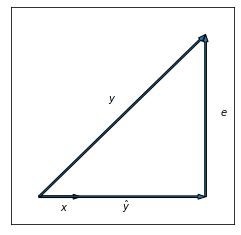

In [2]:
from my_functions.ordinary_least_squares import orthogonal
orthogonal.show()

証明

---

最小二乗法で決定された回帰直線はデータセットの中心を通るので、 $\displaystyle \boldsymbol{\hat{y}} =b\boldsymbol{x}$  。  
したがって、 $\boldsymbol{x}$ と $\boldsymbol{\hat{y}}$ は同じ向きのベクトル。  
また、残差のベクトル $\displaystyle \boldsymbol{e} =y-\boldsymbol{\hat{y}}$ の長さは

$
\displaystyle \begin{aligned}
    \| \boldsymbol{e} \|  & =\sqrt{
        \sum ^{n}_{i=1} e^{2}_{i}
    }\\
     & =\sqrt{
         \sum ^{n}_{i=1}\left( y_{i} -\hat{y}_{i}\right)^{2}
     }
\end{aligned}
$

なので、最小二乗法はベクトル $\boldsymbol{x}$ の線上で残差ベクトル $\boldsymbol{e}$ の長さが最小になるように係数を決定していると見ることができる。  
この条件で残差ベクトル $\boldsymbol{e}$ の長さが最小になるのは $\boldsymbol{e}$ と $\boldsymbol{\hat{y}}$ が直交するとき。

---

上の図より、三平方の定理を用いて平方和分解が導ける。

$
\displaystyle \begin{aligned}
    \| \boldsymbol{y} \| ^{2} & =\| \hat{\boldsymbol{y}} \| ^{2} & + & \| \boldsymbol{e} \| ^{2}\\
    \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2} & =\sum ^{n}_{i=1}\left(\hat{y}_{i} -\overline{y}\right)^{2} & + & \sum ^{n}_{i=1} e^{2}_{i}\\
    V( y) & =V\left(\hat{y}\right) & + & V( e)
\end{aligned}
$

また、 2 つのベクトル $\hat{y}$ と $e$ が直交する (無相関である) ことを前提とすれば、[分散の性質](mean_and_variance.ipynb#%E5%B9%B3%E5%9D%87-(%E6%9C%9F%E5%BE%85%E5%80%A4)-%E3%81%A8%E5%88%86%E6%95%A3%E3%81%AE%E6%80%A7%E8%B3%AA)からも

$
\displaystyle \begin{aligned}
    V( y) & =V\left(\hat{y} +e\right)\\
     & =V\left(\hat{y}\right) +2Cov\left(\hat{y} ,e\right) +V( e)\\
     & =V\left(\hat{y}\right) +V( e)
\end{aligned}
$

と分散 (平方和) の分解が導ける。

練習問題

---
`boston`データセットのうち`LSTAT`列を用いて単回帰分析を実施し、説明変数と残差の相関係数を確認する。

In [3]:
loader = load_boston()
boston = pd.DataFrame(np.column_stack([loader.data, loader.target]),
                      columns=list(loader.feature_names) + ['target'])
print('boston')
display(boston)

boston


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


解答例

---

In [4]:
x = boston['LSTAT'].values.reshape(-1, 1)
y = boston['target']
model = LinearRegression().fit(x, y)
y_hat = model.predict(x)
e = y - y_hat
cor = np.corrcoef(x.ravel(), e)[0, 1]
print(f'相関係数 : {cor:.3f}')

相関係数 : -0.000


---

練習問題

---
`boston`データセットに対して重回帰分析を実施し、予測値と残差の相関係数を確認する。

解答例

---

In [5]:
x = boston.iloc[:, :-1]
y = boston.iloc[:, -1]
model = LinearRegression().fit(x, y)
y_hat = model.predict(x)
e = y - y_hat
cor = np.corrcoef(y_hat, e)[0, 1]
print(f'相関係数 : {cor:.3f}')

相関係数 : -0.000


---

## 決定係数 ($R^{2}$, coefficient of determination)
---
回帰モデルのあてはまりの良さを表す指標の 1 つ。説明変数と目的変数の重相関係数 $R$ を用いて $R^{2}$ で表すことが多い。  
重相関係数とは、 3 以上の変数があるときの、 1 つの変数と他の全ての変数 (の線型結合) との相関係数。つまり、 $y$ と $\hat{y}$ の相関係数。

決定係数 $
\displaystyle \eta ^{2} =1-\frac
    {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\hat{y}_{i}\right)^{2}}
    {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}}
$

**最小二乗法を用いた場合**、上で定義した**決定係数と重相関係数の二乗は一致**する。 (単回帰分析の場合は相関係数)

証明

---

$
\begin{align}
    R^{2} & =S^{2}_{\hat{y} y}\\
     & =\frac
         {\left\{ {\displaystyle
             \sum ^{n}_{i=1}\left(\hat{y}_{i} -\overline{y}\right)\left( y_{i} -\overline{y}\right)
         }\right\} ^{2}}
         {{\displaystyle
             \sum ^{n}_{i=1}\left(\hat{y}_{i} -\overline{y}\right)^{2}\sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}
         }}
\end{align}
$

ここで

$
\begin{align}
    \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)\left(\hat{y}_{i} -\overline{y}\right) & =\sum ^{n}_{i=1}\left(\hat{y}_{i} +\hat{e}_{i} -\overline{y}\right)\left(\hat{y}_{i} -\overline{y}\right)\\
     & =\sum ^{n}_{i=1}\left(\hat{y} -\overline{y}\right)^{2} +\sum ^{n}_{i=1}\hat{e}_{i}\left(\hat{y}_{i} -\overline{y}\right)
\end{align}
$

最小二乗法では残差ベクトルと予測値のベクトルは直交するので、 $\displaystyle \sum ^{n}_{i=1}\hat{e}_{i}\left(\hat{y}_{i} -\overline{y}\right) =0$ より

$
{\displaystyle
    \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)\left(\hat{y}_{i} -\overline{y}\right) =\sum ^{n}_{i=1}\left(\hat{y} -\overline{y}\right)^{2}
}
$

したがって

$
\displaystyle \begin{aligned}
    R^{2} & =\frac
        {\left\{ {\displaystyle \sum ^{n}_{i=1}\left(\hat{y}_{i} -\overline{y}\right)\left( y_{i} -\overline{y}\right) }\right\} ^{2}}
        {{\displaystyle \sum ^{n}_{i=1}\left(\hat{y}_{i} -\overline{y}\right)^{2}\sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}}}
    \\
     & =\frac
         {\left\{ {\displaystyle
             \sum ^{n}_{i=1}\left(\hat{y} -\overline{y}\right)^{2}
         }\right\} ^{2}}
         {{\displaystyle
             \sum ^{n}_{i=1}\left(\hat{y}_{i} -\overline{y}\right)^{2}\sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}
         }}\\
     & =\frac
         {{\displaystyle
             \sum ^{n}_{i=1}\left(\hat{y} -\overline{y}\right)^{2}
         }}
         {{\displaystyle
             \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}
         }}
\end{aligned}
$

また、偏差平方和分解 $\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2} =\sum ^{n}_{i=1}\left(\hat{y}_{i} -\overline{y}\right)^{2} +\sum ^{n}_{i=1} e^{2}_{i}$ より

$
\displaystyle \begin{aligned}
    R^{2} & =\frac
        {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2} -\sum ^{n}_{i=1} e^{2}_{i}}
        {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}}
    \\
     & \\
     & =1-\frac
         {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\hat{y}_{i}\right)^{2}}
         {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}}
     \\
     & \\
     & =\eta ^{2}
\end{aligned}
$

---

### 寄与率
---
偏差平方和分解を利用すると、**最小二乗法を用いた場合**、**決定係数は目的変数の分散のうち予測値 (説明変数) で説明できる割合 (寄与率)** を表すことがわかる。

決定係数 $\displaystyle \begin{aligned}
    \eta ^{2} & =\frac
        {V\left(\hat{y}\right)}
        {V( y)}
\end{aligned}$

証明

---

$
\begin{aligned}
    \eta ^{2} & =1-\frac
        {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\hat{y}_{i}\right)^{2}}
        {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}}
    \\
     & \\
     & =\frac
         {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2} -\sum ^{n}_{i=1}\left( y_{i} -\hat{y}_{i}\right)^{2}}
         {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}}
     \\
     & \\
     & =\frac
         {\displaystyle \sum ^{n}_{i=1}\left(\hat{y}_{i} -\overline{y}\right)^{2}}
         {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}}
     \\
     & \\
     & =\frac
         {V\left(\hat{y}\right)}
         {V( y)}
\end{aligned}
$

---

In [6]:
from my_functions.ordinary_least_squares import explained_variance
explained_variance.show()

interactive(children=(FloatSlider(value=0.8, continuous_update=False, description='相関係数 (目安)', max=1.0, min=0.…

## 相関分析への応用

### 偏相関係数 (partial correlation coefficient)
---
2 変数 $x,y$ の相関を考えるときに、両者に共通して影響を与える交絡因子 $z$ があるとする。この $z$ の影響を取り除いたとしても $x,y$ に相関があるか知りたい。  
このとき、 $z$ の影響を取り除いた後の $x',y'$ の相関係数を偏相関係数といい、 $
\displaystyle r_{x'y'} =\frac
    {r_{xy} -r_{xz} r_{yz}}
    {\sqrt{
        1-r^{2}_{xz}
    }\sqrt{
        1-r^{2}_{yz}
    }}
$ で表される。

単回帰分析で、目的変数から説明変数による影響を取り除けることを利用する。

証明

---

$x,y$ から $z$ で説明できる部分を取り除けばよいので、 $x,z$ ・ $y,z$ の回帰方程式 $\hat{x} =a_{1} +b_{1} z,\hat{y} =a_{2} +b_{2} z$ を考える。それぞれから $z$ で説明できる部分を取り除いたものは残差 $e_{x} ,e_{y}$ で表されるので、その相関係数が求める $r_{x'y'}$ 。

$
\displaystyle \hat{x} =\overline{x} +\frac
    {Cov( x,z)}
    {V( z)}
\left( z-\overline{z}\right)
$ より、 $\displaystyle e_{x} =x-\hat{x} =x-\overline{x} -\frac{Cov( x,z)}{V( z)}\left( z-\overline{z}\right)$  
$y$ についても同様に $\displaystyle e_{y} =y-\hat{y} =y-\overline{y} -\frac{Cov( y,z)}{V( z)}\left( z-\overline{z}\right)$

したがって

$
\begin{aligned}
    r_{e_{x} e_{y}} & =\frac
        {Cov( e_{x} ,e_{y})}
        {S( e_{x}) S( e_{y})}\\
     & =\frac
         {\displaystyle \frac
             {1}
             {n}
         \sum ^{n}_{i=1}\left( e_{x} -\overline{e}_{x}\right)\left( e_{y} -\overline{e}_{y}\right)}
         {\sqrt{
             \displaystyle \frac
                 {1}
                 {n}
             \sum ^{n}_{i=1}\left( e_{x} -\overline{e}_{x}\right)^{2}
         }\sqrt{
             \displaystyle \frac
                 {1}
                 {n}
             \sum ^{n}_{i=1}\left( e_{y} -\overline{e}_{y}\right)^{2}
         }}
\end{aligned}
$

$\overline{e}_{x} =0,\overline{e}_{y} =0$ より

$
\displaystyle \begin{aligned}
    r_{e_{x} e_{y}} & =\frac
        {\displaystyle \sum ^{n}_{i=1} e_{x} e_{y}}
        {\sqrt{
            \displaystyle \sum ^{n}_{i=1} e^{2}_{x}
        }\sqrt{
            \displaystyle \sum ^{n}_{i=1} e^{2}_{y}
        }}\\
     & =\frac
         {\displaystyle \sum ^{n}_{i=1}\left\{\left( x_{i} -\overline{x}\right) -\frac
             {Cov( x,z)}
             {V( z)}
         \left( z_{i} -\overline{z}\right)\right\}\left\{\left( y_{i} -\overline{y}\right) -\frac
             {Cov( y,z)}
             {V( z)}
         \left( z_{i} -\overline{z}\right)\right\}}
         {\sqrt{
             \displaystyle \sum ^{n}_{i=1}\left\{\left( x_{i} -\overline{x}\right) -\frac
                 {Cov( x,z)}
                 {V( z)}
             \left( z_{i} -\overline{z}\right)\right\}^{2}
         }\sqrt{
             \displaystyle \sum ^{n}_{i=1}\left\{\left( y_{i} -\overline{y}\right) -\frac
                 {Cov( y,z)}
                 {V( z)}
             \left( z_{i} -\overline{z}\right)\right\}^{2}
         }}\\
     & =\frac
         {\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)\left( y_{i} -\overline{y}\right) -\frac
             {Cov( y,z)}
             {V( z)}
         \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)\left( z_{i} -\overline{z}\right) -\frac
             {Cov( x,z)}
             {V( z)}
         \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)\left( z_{i} -\overline{z}\right) +\frac
             {Cov( x,z) Cov( y,z)}
             {V( z)^{2}}
         \sum ^{n}_{i=1}\left( z_{i} -\overline{z}\right)^{2}}
         {\sqrt{
             \displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2} -2\frac
                 {Cov( x,z)}
                 {V( z)}
             \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)\left( z_{i} -\overline{z}\right) +\frac
                 {Cov( x,z)^{2}}
                 {V( z)^{2}}
             \sum ^{n}_{i=1}\left( z_{i} -\overline{z}\right)^{2}
         }\sqrt{
             \displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2} -2\frac
                 {Cov( y,z)}
                 {V( z)}
             \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)\left( z_{i} -\overline{z}\right) +\frac
                 {Cov( y,z)^{2}}
                 {V( z)^{2}}
             \sum ^{n}_{i=1}\left( z_{i} -\overline{z}\right)^{2}
         }}\\
     & =\frac
         {\displaystyle nCov( x,y) -\frac
             {Cov( y,z)}
             {V( z)}
         \cdot nCov( x,z) -\frac
             {Cov( x,z)}
             {V( z)}
         \cdot nCov( y,z) +\frac
             {Cov( x,z) Cov( y,z)}
             {V( z)^{2}}
         \cdot nV( z)}
         {\sqrt{
             \displaystyle nV( x) -2\frac
                 {Cov( x,z)}
                 {V( z)}
             \cdot nCov( x,z) +\frac
                 {Cov( x,z)^{2}}
                 {V( z)^{2}}
             \cdot nV( z)
         }\sqrt{
             \displaystyle nV( y) -2\frac
                 {Cov( y,z)}
                 {V( z)}
             \cdot nCov( y,z) +\frac
                 {Cov( y,z)^{2}}
                 {V( z)^{2}}
             \cdot nV( z)
         }}\\
     & =\frac
         {\displaystyle Cov( x,y) -\frac
             {Cov( x,z) Cov( y,z)}
             {V( z)}
         }
         {\sqrt{
             \displaystyle V( x) -\frac
                 {Cov( x,z)^{2}}
                 {V( z)}
         }\sqrt{
             \displaystyle V( y) -\frac
                 {Cov( y,z)^{2}}
                 {V( z)}
         }}\\
     & =\frac
         {\displaystyle \frac
             {Cov( x,y)}
             {\sqrt{
                 V( x) V( y)
             }}
         -\frac
             {Cov( x,z)}
             {\sqrt{
                 V( x) V( z)
             }}
         \cdot \frac
             {Cov( y,z)}
             {\sqrt{
                 V( y) V( z)
             }}
         }
         {\sqrt{
             \displaystyle 1-\frac
                 {Cov( x,z)^{2}}
                 {V( x) V( z)}
         }\sqrt{
             \displaystyle 1-\frac
                 {Cov( y,z)^{2}}
                 {V( y) V( z)}
         }}\\
     & =\frac
         {r_{xy} -r_{xz} r_{yz}}
         {\sqrt{
             1-r^{2}_{xz}
         }\sqrt{
             1-r^{2}_{yz}
         }}
\end{aligned}
$

---

## 単回帰分析への応用

### 問題の背景
---
回帰分析を用いる目的は、目的変数 $y$ と説明変数 $x$ の因果関係を解き明かすことだが、**相関関係があるからといって因果関係があるわけではない。**

特に因果関係はないのに偶然相関が現われることもある。  
交絡因子と呼ばれる $x$ と $y$ の両方に影響を与える因子 $z$ の存在によって、 $xy$ 間に直接の因果関係がないのに相関が発生してしまう疑似相関という現象もある。例えば、小学生の体力測定と学力テストの結果に相関が見られるときに、体力→学力または学力→体力という因果関係があるとは通常考えられない。この場合、学年 (年齢) という別の因子が両者に影響を与えているだけである。

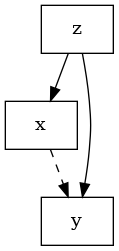

In [7]:
from my_functions.ordinary_least_squares import confounding
Image(confounding.get())

また、複数変数のうちどちらが原因 $x$ と結果 $y$ になるのかはドメイン知識をもとに推測しなくてはならない。

ただし、分析の目的として予測結果が得られればいいのであれば因果関係をそれほど重視しなくていい場合もある。  
これは統計解析と機械学習の基本的なスタンスの違いにも関係する。

統計解析の関心 (目的) は主に手元のデータの理解 (ある変数を他の変数で説明できるか) にある。 (例えば学力に影響を与える要因を理解し、学力を上げる施策を考えるなど)  
機械学習の関心 (目的) は主に未知のデータの予測にある。 (例えば各広告のクリック率を予測し、最もクリックされる可能性の高い広告を表示するなど)

<table class="border background-bright text-center">
    <tr class="background-dark">
        <th></th>
        <th>目的</th>
        <th>重視する点</th>
        <th>次のステップ</th>
    </tr>
    <tr>
        <th class="border-bottom background-dark">統計解析</th>
        <td>どの変数が目的変数を説明できるか解明<br />$\hat{y}=a+bx$ の $b$</td>
        <td>結論に至った理由を人間が理解できるか<br />(現状の理解)</td>
        <td>処方箋<br />(未来の変更)</td>
    </tr>
    <tr>
        <th class="border-bottom background-dark">機械学習</th>
        <td>未知のデータをできるだけ正確に予測<br />$\hat{y}=a+bx$ の $\hat{y}$</td>
        <td>予測の精度<br />(未来の理解)</td>
        <td>自動化<br />(現状の変更)</td>
    </tr>
</table>

上のように統計解析の最終目的は、説明変数を操作して目的変数に影響を与えるという場合が多いので、以下のような特徴がある。
- 説明変数と目的変数の間に因果関係があることを求める
- 説明変数が操作可能であることが重要
- 説明変数同士が独立である (ある説明変数が変わるような施策を実行したときに他の変数がつられて動かない) ことを求める
- 数個程度の少ない変数に絞り込む (それほど多数の変数に介入することは難しいし、多数の変数が全て独立であることはほとんどない)

これに対して機械学習の最終目的は、予測の正確さである場合が多いので、以下のような特徴がある。
- 交絡は比較的気にしない
- 変数はできるだけ多く使用する

もちろん、これらの中間的な部分はどちらにも存在し、程度問題であるので、実用上は分野の違いではなく自分の分析目的や求められる要件に応じて重視する点を変えればよい。

### 偏回帰係数 (partial regression coefficient)
---
変数 $x$ (および $y$) から $z$ の影響を取り除いた残差 $e_{x}$ (および $e_{y}$) を用いた回帰方程式 $y=a+be_{x}$ (または $e_{y}=a+be_{x}$) の回帰係数 $b$ を偏回帰係数といい、 $
\displaystyle \frac
    {( r_{xy} -r_{xz} r_{yz}) S( y)}
    {\left( 1-r^{2}_{xz}\right) S( x)}
$ で表される。

説明変数 $x$ と目的変数 $y$ を標準化して得た回帰方程式の偏回帰係数は標準偏回帰係数といい、 $
\displaystyle \frac
    {r_{xy} -r_{xz} r_{yz}}
    {1-r^{2}_{xz}}
$ で表される。

証明

---

回帰方程式 $y=a+bx$ の係数 $
\displaystyle b=r_{xy}\frac
    {S( y)}
    {S( x)}
$ より、偏回帰係数は $
\displaystyle r_{e_{x} e_{y}}\frac
    {S( e_{y})}
    {S( e_{x})}
$

ここで平方和分解より

$
\displaystyle \begin{aligned}
    S( e) & =\sqrt{
        V( e)
    } & \\
     &  & \\
     & =\sqrt{
         V( y) -V\left(\hat{y}\right)
     } & \\
     &  & \\
     & =\sqrt{
         V( y) -b^{2} V( x)
     } & \\
     &  & \\
     & =\sqrt{
         V( y) -\left(\frac
             {Cov( x,y)}
             {V( x)}
         \right)^{2} V( x)
     } & \\
     &  & \\
     & =\sqrt{
         V( y) -\left(\frac
             {r_{xy} S( x) S( y)}
             {V( x)}
         \right)^{2} V( x)
     } & \because r_{xy} =\frac
         {Cov( x,y)}
         {S( x) S( y)}
     \\
     &  & \\
     & =\sqrt{
         V( y) -\left( r_{xy}\frac
             {S( y)}
             {S( x)}
         \right)^{2} V( x)
     } & \\
     &  & \\
     & =\sqrt{
         V( y) -r^{2}_{xy} V( y)
     } & \\
     &  & \\
     & =S( y)\sqrt{
         1-r^{2}_{xy}
     } & 
\end{aligned}
$

$e_{x},e_{y}$ はそれぞれの回帰方程式 $\hat{x} =a+bz,\hat{y} =a+bz$ の残差なので

$
\begin{cases}
    S( e_{x}) & =S( x)\sqrt{
        1-r^{2}_{xz}
    }\\
    S( e_{y}) & =S( y)\sqrt{
        1-r^{2}_{yz}
    }
\end{cases}
$

したがって

$
\begin{aligned}
    r_{e_{x} e_{y}}\frac
        {S( e_{y})}
        {S( e_{x})}
    & =\frac
        {r_{xy} -r_{xz} r_{yz}}
        {\sqrt{
            1-r^{2}_{xz}
        }\sqrt{
            1-r^{2}_{yz}
        }}
    \cdot \frac
        {S( y)\sqrt{
            1-r^{2}_{yz}
        }}
        {S( x)\sqrt{
            1-r^{2}_{xz}
        }}\\
     & =\frac
         {( r_{xy} -r_{xz} r_{yz}) S( y)}
         {\left( 1-r^{2}_{xz}\right) S( x)}
\end{aligned}
$

標準偏回帰係数は $S( x) =S( y) =1$ とした場合なので、 $\displaystyle \frac{r_{xy} -r_{xz} r_{yz}}{1-r^{2}_{xz}}$

---

## 推薦図書
---
- [心理統計学の基礎―統合的理解のために](https://www.amazon.co.jp/%E5%BF%83%E7%90%86%E7%B5%B1%E8%A8%88%E5%AD%A6%E3%81%AE%E5%9F%BA%E7%A4%8E%E2%80%95%E7%B5%B1%E5%90%88%E7%9A%84%E7%90%86%E8%A7%A3%E3%81%AE%E3%81%9F%E3%82%81%E3%81%AB-%E6%9C%89%E6%96%90%E9%96%A3%E3%82%A2%E3%83%AB%E3%83%9E-%E5%8D%97%E9%A2%A8%E5%8E%9F-%E6%9C%9D%E5%92%8C/dp/4641121605/)